In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%pprint

Pretty printing has been turned OFF


In [3]:
import glob
import sys,os
import pandas as pd
import os
import pydicom
import SimpleITK as sitk
import ipywidgets as widgets
import matplotlib.mlab as mlab
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import norm
from tqdm import tqdm
pd.set_option('display.max_colwidth', 500)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from ipywidgets import interactive, widgets, Layout, Box
from IPython.display import display
from IPython.display import clear_output
from scipy.signal import savgol_filter
import shutil
import matplotlib
matplotlib.style.use('ggplot')
plt.style.use('seaborn-poster')
for path in ['..','../..']:
    sys.path.append(path)
import utils.settings as S

In [4]:
images_stats_csv= pd.read_csv(os.path.join(S.sheets_folder,"mr_image_stats.csv"))

In [5]:
images_stats_csv.columns

Index(['mri_id', 'study_uid', 'series_uid', 'series_number', 'slice_tickness',
       'pixel_spacing', 'n_files', 'study_description', 'series_description',
       'modality', 'strength', 'manufacturer', 'station', 'model_name',
       'coil_name'],
      dtype='object')

## manufacturers

In [10]:
images_stats_csv.loc[images_stats_csv["manufacturer"]=='SIEMENS','mri_id'].unique()

array(['/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_081',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_083',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_084',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_085',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_086',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_087',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_088',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_089',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_090',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_091',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_092',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_093',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_094',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_095',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_096',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_097',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_099',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_100',
       '/D

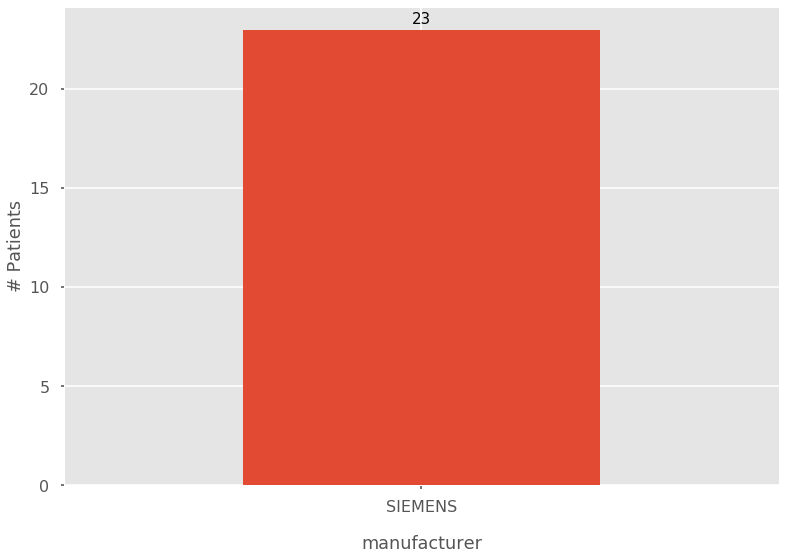

In [11]:
ax = images_stats_csv.groupby("manufacturer")["mri_id"].nunique().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)
ax.set_ylabel('# Patients')
plt.setp(plt.xticks()[1], rotation=360)
ax.xaxis.labelpad = 20
plt.show()

# coil name

In [13]:
ax = images_stats_csv.groupby("coil_name")["mri_id"].nunique().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)
ax.set_ylabel('# Patients')
ax.xaxis.labelpad = 20
plt.show()

TypeError: no numeric data to plot

## Field strength

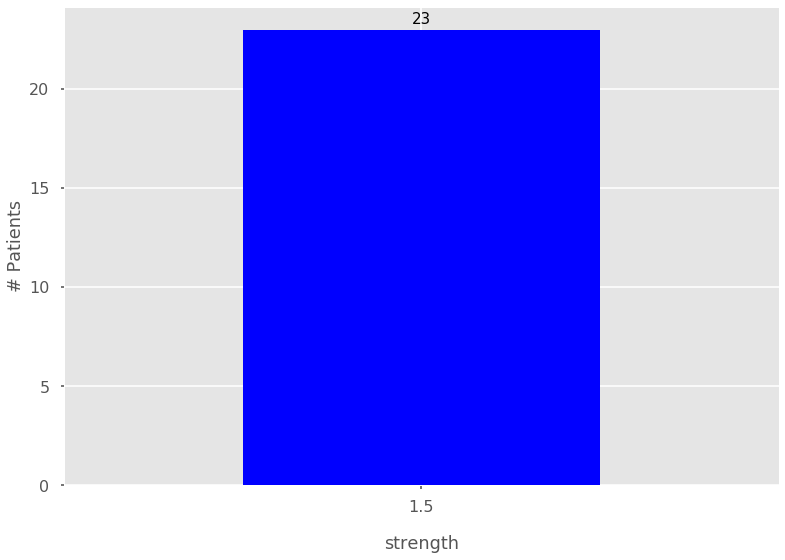

In [14]:
ax = images_stats_csv.groupby("strength")["mri_id"].nunique().plot.bar(color=['blue'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)
ax.set_ylabel('# Patients')
plt.setp(plt.xticks()[1], rotation=360)
ax.xaxis.labelpad = 20
plt.show()

## model name

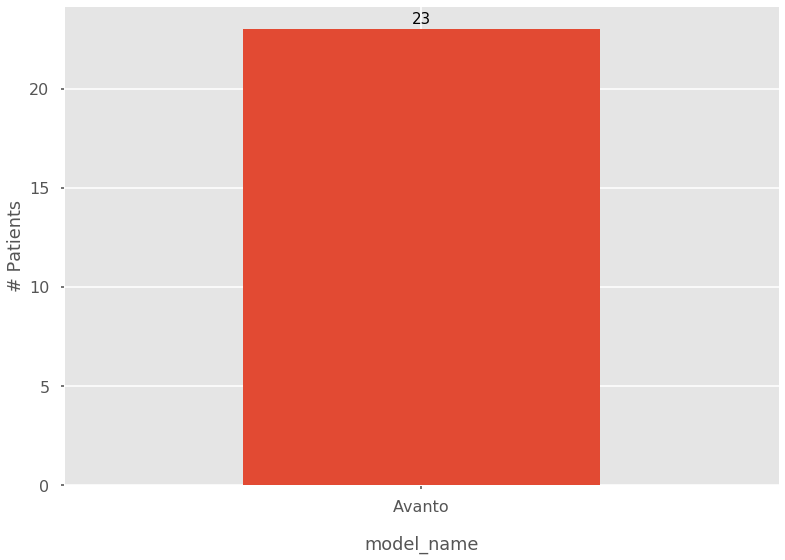

In [15]:
ax = images_stats_csv.groupby("model_name")["mri_id"].nunique().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)
ax.set_ylabel('# Patients')
plt.setp(plt.xticks()[1], rotation=360)
ax.xaxis.labelpad = 20
plt.show()

## station

In [16]:
ax = images_stats_csv.groupby("station")["mri_id"].nunique().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)
ax.set_ylabel('# Patients')
plt.setp(plt.xticks()[1], rotation=30)
ax.xaxis.labelpad = 20
plt.show()

TypeError: no numeric data to plot

# Study Description

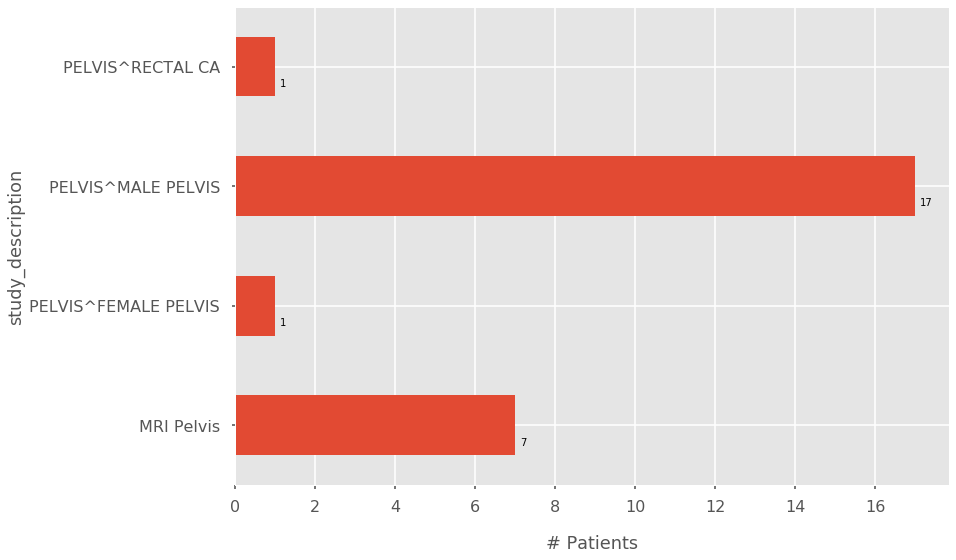

In [17]:
# images_stats_csv['study description']
ax = images_stats_csv.groupby("study_description")["mri_id"].nunique().plot.barh()
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')
ax.set_xlabel('# Patients')
# plt.setp(plt.xticks()[1])
ax.xaxis.labelpad = 20
plt.show()

# Series Description

In [18]:
images_stats_csv.loc[images_stats_csv["series_description"].str.contains('DYNAMIC',case=False),"mri_id"].unique()
# images_stats_csv.loc[images_stats_csv["series description"]=='DYNAMIC',"patient id"].unique()

array(['/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_084',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_085',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_089',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_091',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_096',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_101',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_103A',
       '/DATA/hmrc_menard/AndrewKGH_NewData/PCAD_103B'], dtype=object)

In [19]:
images_stats_csv.loc[images_stats_csv["series_description"].str.contains('calib|cal|coil',case=False),"series_description"].unique()

array(['localizer NON BH'], dtype=object)

In [20]:
unique_series_description = images_stats_csv["series_description"].unique()

In [23]:
unique_series_description

array(['AX T1 PELVIS', 'AX DIFF B 150, 500, 1300',
       'AX DIFF B 150, 500, 1300_ADC', 'DYMAIC LOOP', 'AX T2 PELVIS',
       'TRUE COR T2 PROSTATE INCLUDE SEMINAL VESSICLES NO FS',
       'TRUE AX T2 PROSTATE INCLUDE SEMINAL VESSICLES NO FS',
       'TRUE SAG T2 PROSTATE INCLUDE SEMINAL VESSICLES NO FS', 'AX T1',
       'AX/OBL T1 FS PRE', 'AX/OBL T1 FS POST', 'SUB_S9-S8_1',
       'localizer NON BH', 'AX T2 SMALL FOV', 'SAG T2', 'AX T2',
       'LOOP DYNAMIC', 'TRUE AX T2 smFOV INCLUDE SEMINAL VESSICLES',
       'Dyn Loop', 'TRUE SAG T2 smFOV INCLUDE SEMINAL VESSICLES',
       'TRUE COR T2 smFOV INCLUDE SEMINAL VESSICLES',
       'COR T2 BLADE smFOV', 'Argus - 20181117 12:12',
       'SAG T2 BLADE smFOV', 'AX T2 BLADE smFOV',
       'AX VIBE FS POST - PELVIS', 'DYNAMIC CINE LOOP', 'AX DYN LOOPS',
       'dynamic cine loop', 'DYN LOOP', 'AX DYN LOOP', 'ÀX DYN loop',
       'AX T1 DYN LOOP', 'Argus - 20190412 08:25',
       'Results MR Basic Reading', 'dynamic loop ', 'DYN Loop'],
  

In [25]:
filtered_keys = ['localizer','T1','ADC','(','plane','DCE','Plane','SAG','COR','SUB','Calib','Screen','Cal','dce']
[serie for serie in unique_series_description if not any(key in serie for key in filtered_keys)]

['AX DIFF B 150, 500, 1300', 'DYMAIC LOOP', 'AX T2 PELVIS', 'TRUE AX T2 PROSTATE INCLUDE SEMINAL VESSICLES NO FS', 'AX T2 SMALL FOV', 'AX T2', 'LOOP DYNAMIC', 'TRUE AX T2 smFOV INCLUDE SEMINAL VESSICLES', 'Dyn Loop', 'Argus - 20181117 12:12', 'AX T2 BLADE smFOV', 'AX VIBE FS POST - PELVIS', 'DYNAMIC CINE LOOP', 'AX DYN LOOPS', 'dynamic cine loop', 'DYN LOOP', 'AX DYN LOOP', 'ÀX DYN loop', 'Argus - 20190412 08:25', 'Results MR Basic Reading', 'dynamic loop ', 'DYN Loop']

In [ ]:
%pprint

In [ ]:
T2_AX= [serie for serie in unique_series_description if 'T2' in serie.upper() and 'AX' in serie.upper()]
T2_SAG= [serie for serie in unique_series_description if 'T2' in serie.upper() and 'SAG' in serie.upper()]
T2_COR= [serie for serie in unique_series_description if 'T2' in serie.upper() and 'COR' in serie.upper()]

In [ ]:
[serie for serie in unique_series_description if 'T2' in serie.upper()]

# All T1

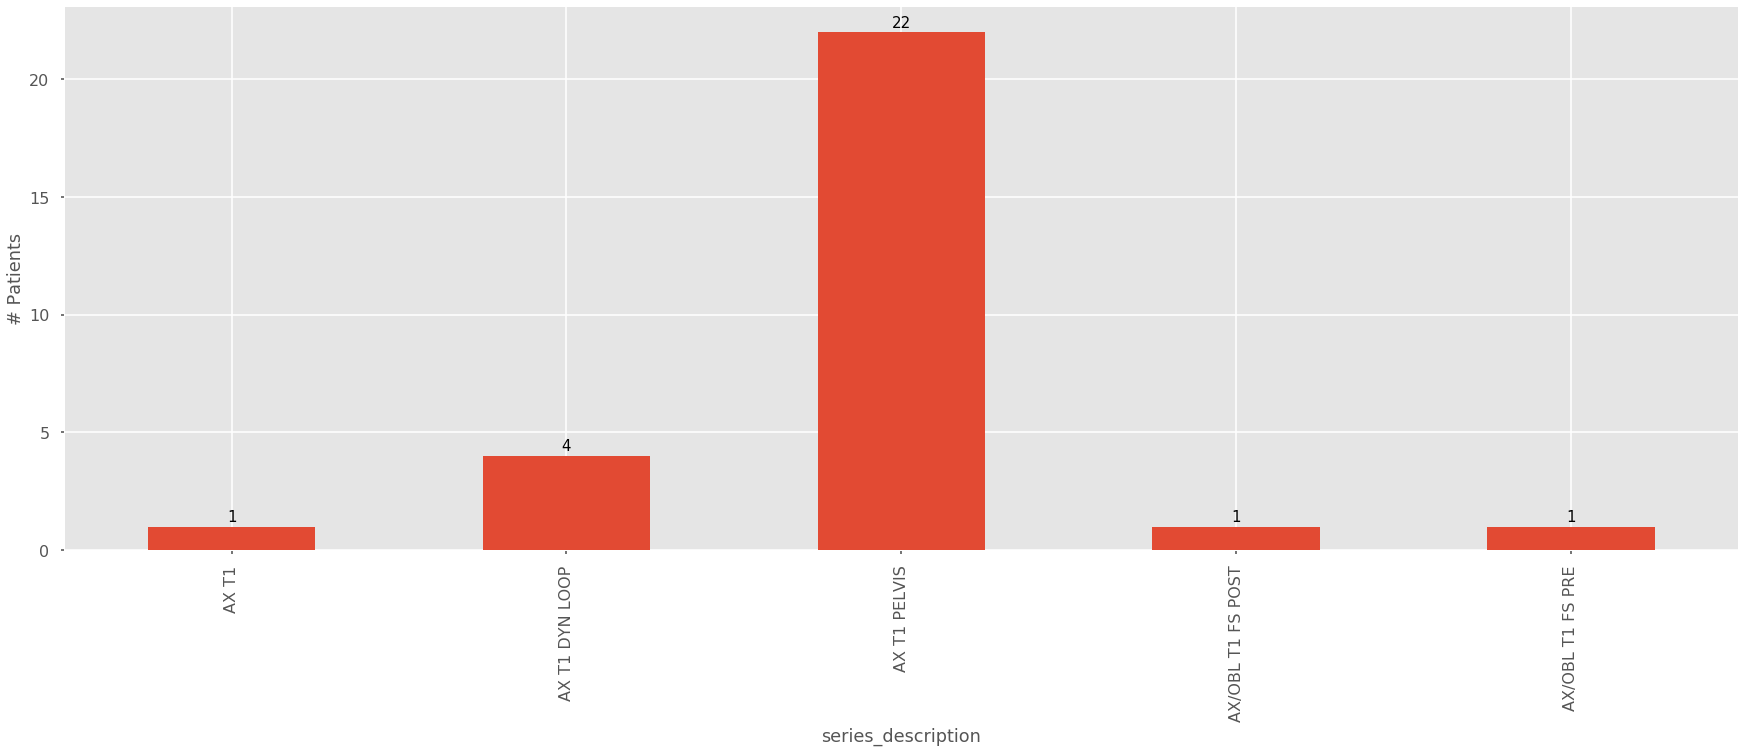

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 30,10
ax = images_stats_csv.loc[images_stats_csv["series_description"].str.contains('T1')].groupby('series_description')["mri_id"].nunique().plot.bar()

# ax = images_stats_csv.groupby("study description")["patient id"].nunique().plot.barh()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)
ax.set_ylabel('# Patients')
# plt.setp(plt.xticks()[1], rotation=30, fontsize=10)
ax.xaxis.labelpad = 5
plt.show()

## All T2

In [34]:
L = images_stats_csv.loc[images_stats_csv["series_description"].str.contains('AX T2 PELVIS'),"mri_id"].tolist()


In [37]:
from pathlib import Path

In [39]:
ids = [Path(i).stem for i in L]

In [44]:
set([Path(i).stem for i in images_stats_csv["mri_id"].tolist()]) - set(ids)

{'PCAD_083'}

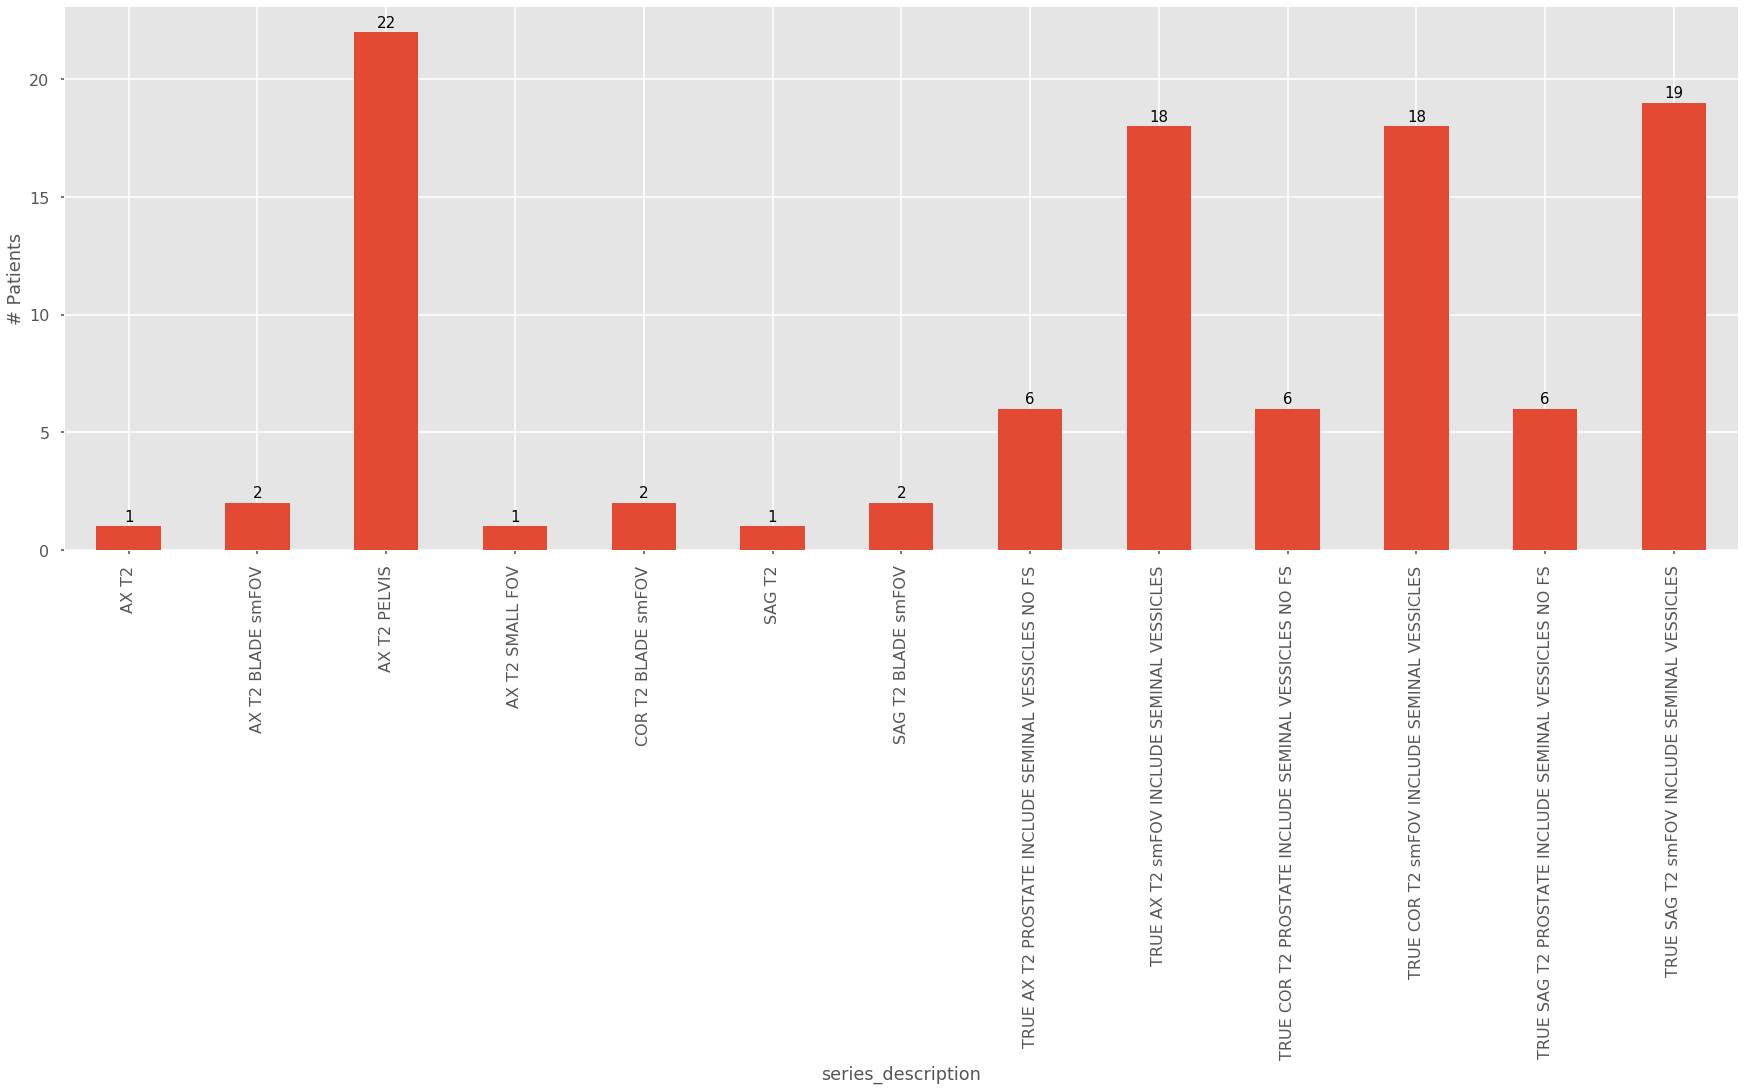

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 30,10
ax = images_stats_csv.loc[images_stats_csv["series_description"].str.contains('T2')].groupby('series_description')["mri_id"].nunique().plot.bar()

# ax = images_stats_csv.groupby("study description")["patient id"].nunique().plot.barh()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)
ax.set_ylabel('# Patients')
# plt.setp(plt.xticks()[1], rotation=30, fontsize=10)
ax.xaxis.labelpad = 5
plt.show()

# DCE

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 30,20
ax = images_stats_csv.loc[images_stats_csv["series description"].str.contains('DCE')].groupby('series description')["patient id"].nunique().plot.barh()

# ax = images_stats_csv.groupby("study description")["patient id"].nunique().plot.barh()
for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points',fontsize=15)
ax.set_xlabel('# Patients')
# plt.setp(plt.xticks()[1])
ax.xaxis.labelpad = 5
ax.tick_params(direction='out', length=6, width=1,labelsize=20)
plt.show()

## contrast agent

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10
contrasts=set(images_stats_csv.loc[~images_stats_csv["contrast"].isnull(),'contrast'].values)
contrast_df=images_stats_csv.loc[~images_stats_csv["contrast"].isnull()]
contrast_df.loc[:,"contrast"]= contrast_df["contrast"].str.split(' ').apply(lambda x:x[-1].lower())
ax = contrast_df.groupby("contrast").size().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)
ax.set_ylabel('# Series')
plt.setp(plt.xticks()[1], rotation=30)
ax.xaxis.labelpad = 20
plt.show()

## DWI

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 30,10
df = images_stats_csv.loc[(images_stats_csv["series description"].str.upper().str.contains('DWI')) & (~images_stats_csv["series description"].str.upper().str.contains('ADC'))]
ax= df.groupby('series description')["patient id"].nunique().plot.bar()

# ax = images_stats_csv.groupby("study description")["patient id"].nunique().plot.barh()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)
#     ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points',fontsize=15)
ax.set_ylabel('# Patients')
plt.setp(plt.xticks()[1])
ax.xaxis.labelpad = 5
plt.show()

## ADC

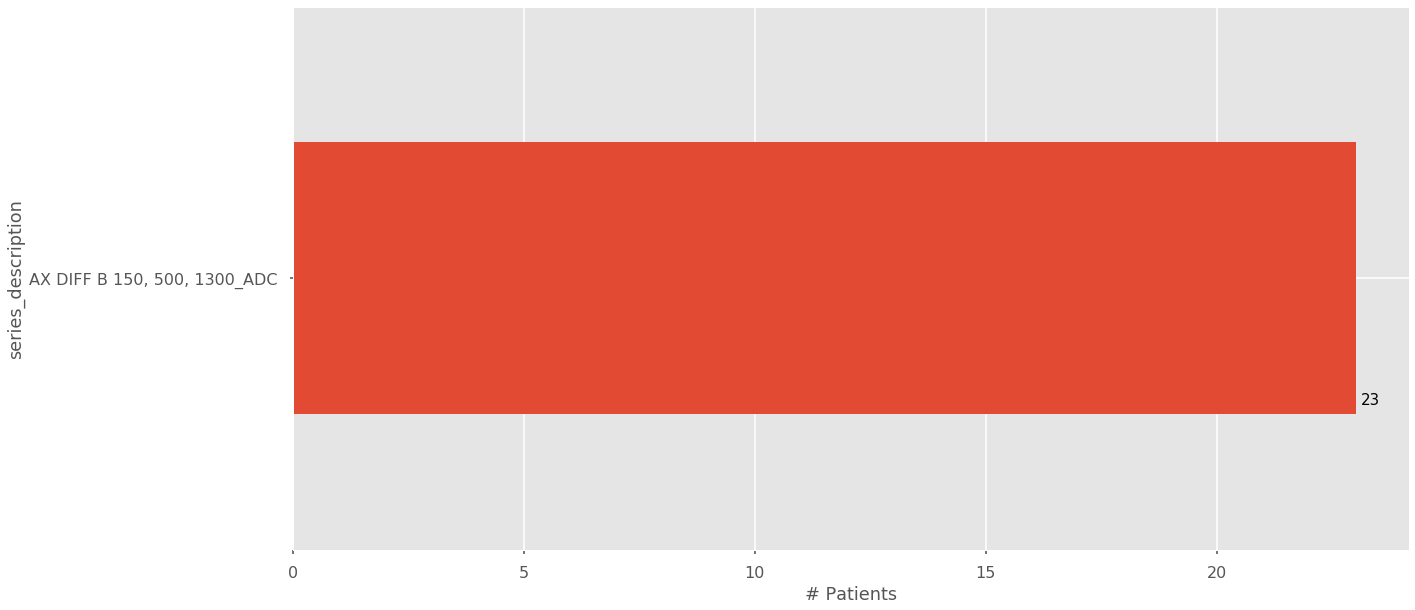

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10
df = images_stats_csv.loc[images_stats_csv["series_description"].str.upper().str.contains('ADC|APPARENT') & (~images_stats_csv["series_description"].str.upper().str.contains('EXPONENTIAL'))]
ax= df.groupby('series_description')["mri_id"].nunique().plot.barh()


for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points',fontsize=15)
ax.set_xlabel('# Patients')
# plt.setp(plt.xticks()[1])
ax.xaxis.labelpad = 5
plt.show()

## Resolve

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10
df = images_stats_csv.loc[images_stats_csv["series description"].str.upper().str.contains('RESOLVE')]
ax= df.groupby('series description')["patient id"].nunique().plot.barh()


for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points',fontsize=15)
ax.set_xlabel('# Patients')
# plt.setp(plt.xticks()[1])
ax.xaxis.labelpad = 5
plt.show()

In [ ]:
want=['(']
[serie for serie in unique_series_description if any(key in serie for key in want)]

In [ ]:
filtered_keys = ['T2','T1','ADC','DCE', 'Apparent','DWI','(','loc','cal','Cal']
want=['(']
[serie for serie in unique_series_description if not any(key in serie for key in filtered_keys)]

## Exponential

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10
df = images_stats_csv.loc[images_stats_csv["series description"].str.upper().str.contains('EXPONENTIAL')]
ax= df.groupby('series description')["patient id"].nunique().plot.barh()


# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_height(),p.get_x()+p.get_width()/2.), ha='center', va='center', xytext=(10,0), textcoords='offset points', fontsize=15)
ax.set_xlabel('# Patients')
# plt.setp(plt.xticks()[1])
ax.xaxis.labelpad = 5
plt.show()

In [ ]:
images_stats_csv.loc[~images_stats_csv["patient id"].isin(df["patient id"].values),"patient id"].nunique()

In [ ]:
df.groupby('series description').size()

In [ ]:
images_stats_csv.loc[images_stats_csv["manufacturer"]=='GE MEDICAL SYSTEMS',"patient id"].nunique()

In [ ]:
dfff= images_stats_csv.loc[images_stats_csv["manufacturer"]=='GE MEDICAL SYSTEMS']
set(dfff.loc[dfff["series description"].str.contains('T2'),"series description"].values)

In [ ]:
dfff= images_stats_csv.loc[images_stats_csv["manufacturer"]!='GE MEDICAL SYSTEMS']
set(dfff.loc[dfff["series description"].str.contains('T2'),"series description"].values)

In [ ]:
images_stats_csv.loc[images_stats_csv["series description"]=='AX 3d T2 trufi']

In [ ]:
garbage_keys = [serie for serie in series_set if serie.startswith('(') & serie.endswith(')')] 
garbage_keys.extend('20090331 10H59M')
adc_keys = [serie for serie in series_set_cleaned if 'Apparent' in serie or 'ADC' in serie]
edc_keys = [serie for serie in series_set_cleaned if 'Exponential' in serie]
remaining_keys=set(series_set)-set(garbage)-set(adc_keys)-set(edc_keys)

In [ ]:
set(series)

In [31]:
from pathlib import Path
patients_dir = Path("/home/sedghi/Desktop/PROSTATE-DIAGNOSIS")

In [32]:
patients = list(patients_dir.glob("*"))
for p in patients:
    count = 0
    study_dirs = list(p.glob("*"))
#     if len(series_dirs) !=1:
#         print(p)
    series_dirs = list(study_dirs[0].glob("*"))
    for series_dir in series_dirs:
        if "T2WTSEAX" in series_dir.stem:
            count += 1
            
    if count!=1:
        print(p)

In [27]:
series_dirs

[PosixPath('/home/sedghi/Desktop/PROSTATE-DIAGNOSIS/ProstateDx-01-0034/08-26-2008-MRI Prostate With and Without Contrast-52048/701-T1WTSEAX-46754'), PosixPath('/home/sedghi/Desktop/PROSTATE-DIAGNOSIS/ProstateDx-01-0034/08-26-2008-MRI Prostate With and Without Contrast-52048/501-T2WTSECOR-48567'), PosixPath('/home/sedghi/Desktop/PROSTATE-DIAGNOSIS/ProstateDx-01-0034/08-26-2008-MRI Prostate With and Without Contrast-52048/801-AX BLISSGAD-91957'), PosixPath('/home/sedghi/Desktop/PROSTATE-DIAGNOSIS/ProstateDx-01-0034/08-26-2008-MRI Prostate With and Without Contrast-52048/601-T2WTSEAX-49418')]

In [14]:
os.listdir(p_dir)

['12-22-2008-MRI PROSTATE WITH AND WITHOUT CONTRAST-93214']